In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
titanic_train = pd.read_csv('C:/Users/erene/Desktop/School/ML/train.csv')
titanic_train.shape #dimensionu kontrol eder

(891, 12)

In [6]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
categorical = titanic_train.dtypes[titanic_train.dtypes == "object"].index
print(categorical)

titanic_train[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
titanic_train["Ticket"][0:50] #ilk 50 bileti gosterir

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
30            PC 17601
31            PC 17569
32              335677
33          C.A. 24579
34            PC 17604
35              113789
36                2677
37          A./5. 2152
38              345764
39                2651
40                7546
41               11668
42              349253
43       SC

In [9]:
titanic_train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [10]:
del titanic_train["Ticket"]        # Remove Ticket

In [11]:
new_Pclass = pd.Categorical(titanic_train["Pclass"], ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [12]:
titanic_train["Cabin"].unique() #siradisi cabinleri listeler

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
char_cabin = titanic_train["Cabin"].astype(str) # veriyi stringe donusturur

new_Cabin = np.array([cabin[0] for cabin in char_cabin]) # sadece ilk harfi alir

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin .describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [14]:
titanic_train["Cabin"] = new_Cabin

dummy_vector = pd.Series([1,None,3,None,7,8])

dummy_vector.isnull()



0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [15]:
titanic_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

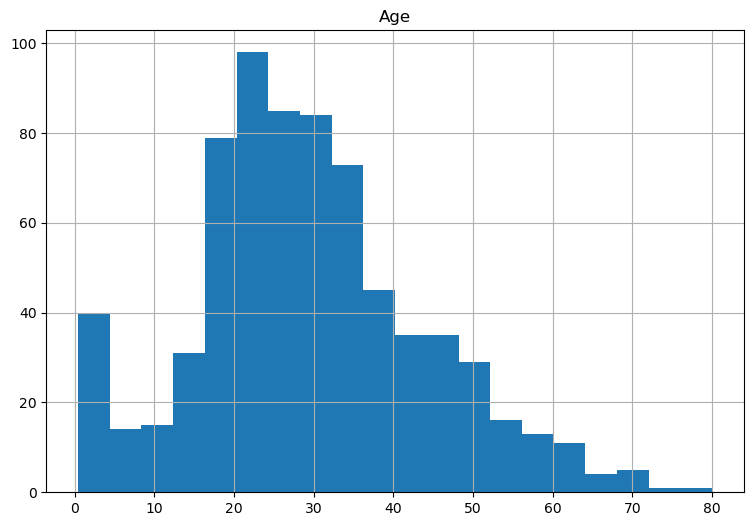

In [16]:
titanic_train.hist(column='Age',figsize=(9,6), bins=20) 

C:\Users\erene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\erene\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


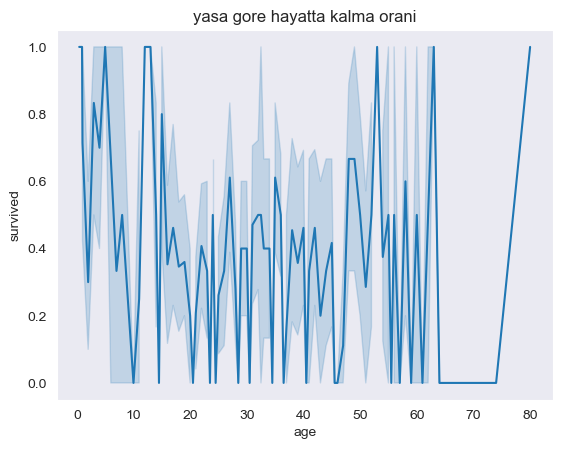

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('titanic')


sns.lineplot(x='age', y='survived', data=data)
plt.title('yasa gore hayatta kalma orani')
sns.set_style('dark')

plt.show()


C:\Users\erene\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\erene\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


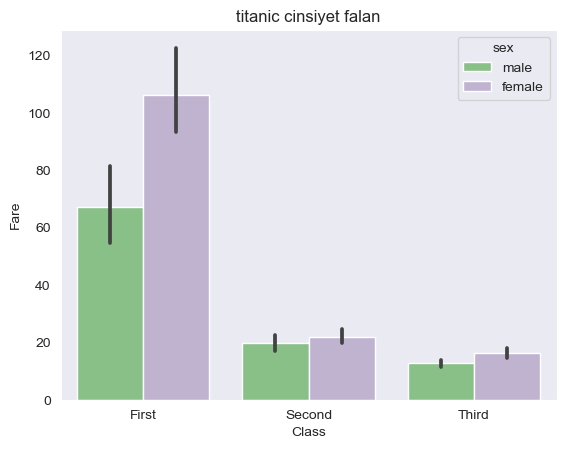

In [21]:

sns.barplot(x='class', y='fare', hue='sex', palette='Accent', data= data)

plt.xlabel('Class')
plt.ylabel('Fare')
plt.title('titanic cinsiyet falan')
plt.show()

C:\Users\erene\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: Unknown format code 'd' for object of type 'float'

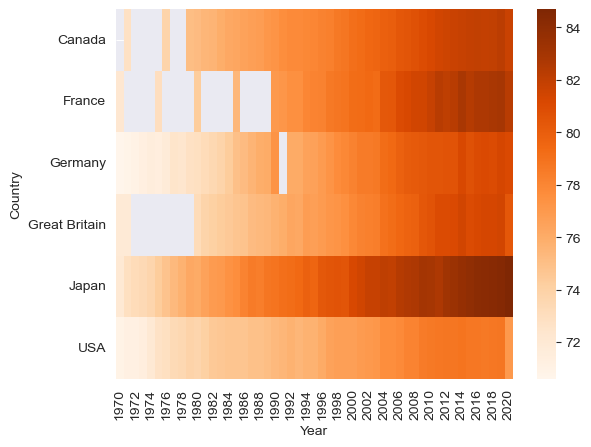

In [40]:
pla = sns.load_dataset('healthexp')
pla = pla.pivot(index='Country', columns='Year', values='Life_Expectancy' )
sns.heatmap(pla, cmap='Oranges', annot=True, fmt='d')
plt.title('country')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()
